<a href="https://colab.research.google.com/github/anelglvz/Matematicas_Ciencia_Datos/blob/main/Optimizaci%C3%B3n/Sub_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sub-gradient descent

Un vector $g \in \mathbb{R}^d$ es un subgradiente de una función $f: \mathbb{R}^d \to \mathbb{R}$ en el punto $x_0$ si para todos los puntos $x$ se satisface que

$$ f(x) \geq f(x_0) + g^T(x-x_0). $$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

In [ ]:
# Solo para que al mostrarnos los arreglos no nos de los valores grandes en notación científica
np.set_printoptions(suppress=True)

## Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Curso-Algebra/semana10/pruebas_datos.csv')
df

,OTR,OCR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,...,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,NbSecondWithAtLeatOneTrade,type
0,-0.264140,-0.171596,-0.034334,0.173848,-0.051861,-0.194635,-0.103174,-0.493894,0.669772,0.113391,...,0.446317,0.159271,-0.989267,-0.459192,0.414463,-0.068166,2.257305,0.215650,-0.430203,1
1,-0.267371,0.071957,-0.034334,-0.394632,-0.051861,-0.261262,-0.107967,-0.578826,-0.714095,0.478099,...,0.341803,0.053125,-0.989267,0.065955,2.493944,-0.174906,-0.259542,-0.257432,-0.415533,1
2,-0.268571,0.392193,-0.034334,-0.596358,-0.051861,-0.261262,-0.107967,-0.579091,-0.864277,0.449648,...,-0.843156,-0.601191,-0.989267,0.223500,1.925729,-0.174906,-0.350248,-0.257432,-0.351515,1
3,-0.267320,-0.082373,-0.034334,-0.337735,-0.051861,-0.260286,-0.107966,-0.574153,0.401915,-0.240214,...,0.205183,-0.085628,-0.989267,-0.406677,1.394323,-0.174906,-0.056171,-0.257431,-0.430203,1
4,-0.268375,0.094866,-0.034334,-0.551568,-0.051861,-0.261262,-0.107967,-0.579396,-0.876131,-0.003950,...,0.447088,0.160054,-0.989267,0.170985,1.041917,-0.174906,-0.327099,-0.257432,-0.384858,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50577,-0.270438,0.040609,-0.034334,-0.587633,-0.051861,-0.261262,-0.107967,-0.579589,-0.811629,-0.928057,...,-0.499086,-0.800893,-0.989267,-0.039074,2.972986,-0.174905,-0.139995,-0.257431,-0.431537,1
50578,-0.269299,0.040609,-0.034334,-0.704571,-0.051861,-0.261262,-0.107967,-0.573424,-0.873859,-1.356834,...,-0.927494,-1.235990,-0.989267,-0.616736,0.204493,-0.174905,-0.355996,-0.257262,-0.426202,1
50579,-0.270456,0.952123,-0.034334,-0.592510,-0.051861,-0.261262,-0.107967,-0.579500,-0.894274,0.012924,...,0.464365,0.177600,-0.989267,0.276014,1.680116,-0.174905,-0.076802,-0.256689,-0.414199,1
50580,-0.270274,2.659404,-0.034334,-0.648742,-0.051861,-0.261262,-0.107967,-0.579477,-0.886564,-0.241991,...,0.203363,-0.087476,-0.989267,0.748647,1.846925,-0.174905,-0.275480,-0.257133,-0.388859,1


In [ ]:
df.shape

(50582, 26)

## Agregando descripción a los datos

Los datos son públicos, fueron utilizados en una competencia que pueden consultar [AQUÍ](https://challengedata.ens.fr/participants/challenges/50/) (para poder ingresar necesitarán registrarse y luego copiar la dirección en su navegador). En esta competencia registraron muchas características de "traders", para tratar de clasificarlos en HFT (High Frequency Traders) o NON-HFT, esto porque es de gran interes tratar de estudiar el impacto que tienen los HFT en los mercados, ya que lo que hacen es realizar intercambios dando ordenes de intercambio a un mecanismo llamado Limit Order Book (LOB), al cual le ordenan realizar compras o ventas a precios que ellos deseen.

## Descripción de las variables
1. NbTradeVenueMic (23) : Número de centros de negociación en los que opera el jugador del mercado

De todos los centros de negociación, estadísticas sobre el número de operaciones observadas por segundo

2. MaxNbTradesBySecond (24)
3. MeanNbTradesBySecond (25)

Estadísticas sobre el delta de tiempo observado entre dos operaciones en la plataforma de negociación TV_1[1]:

4. min_dt_TV1 (26)
5. med_dt_TV1 (28)
6. mean_dt_TV1 (27)

Estadísticas sobre el delta de tiempo observado entre dos operaciones que se producen en la plataforma de negociación TV_1 y luego en la plataforma de negociación TV_2:

7. min_dt_TV1_TV2 (29)
8. med_dt_TV1_TV2 (31)
9. mean_dt_TV1_TV2 (30)

Estadísticas sobre el delta de tiempo observado entre dos operaciones que se producen en la plataforma de negociación TV_1 y luego en la plataforma de negociación TV_3:

10. min_dt_TV1_TV3 (32)
11. med_dt_TV1_TV3 (34)
12. mean_dt_TV1_TV3 (33)

Estadísticas sobre el delta de tiempo observado entre dos operaciones que se producen en la plataforma de negociación TV_1 y luego en la plataforma de negociación TV_4 :

13. min_dt_TV1_TV4 (35)
14. med_dt_TV1_TV4 (37)
15. mean_dt_TV1_TV4(36)

De todos los centros de negociación, número de segundos durante el día de negociación donde se observa al menos una operación del jugador del mercado i

16. NbSecondWithAtLeatOneTrade(38)

En la plataforma de negociación TV_1, tres proporciones entre el número de todo tipo de eventos[2] enviados a la LOB y:

17. el número de operaciones (OTR) (4)
18. el número de eventos de tipo cancelación (OCR) (5)
19. el número de eventos de tipo de modificación (OMR) (6)

En el centro de negociación TV_1, estadísticas durante el delta de tiempo observado entre dos eventos de todo tipo enviados:

20. min_time_two_events (7)
21. mean_time_two_events (8)
22. 10_p_time_two_events (9)
23. med_time_two_events (10)
24. 25_p_time_two_events (11)
25. 75_p_time_two_events (12)
26. 90_p_time_two_events (13)
27. max_time_two_events (14)

En la plataforma de negociación TV_1, estadísticas a lo largo de la vida útil observada de las órdenes canceladas:

28. min_lifetime_cancel (15)
29. mean_lifetime_cancel (16)
30. 10_p_lifetime_cancel (17)
31. med_lifetime_cancel (18)
32. 25_p_lifetime_cancel (19)
33. 75_p_lifetime_cancel (20)
34. 90_p_lifetime_cancel (21)
35. max_lifetime_cancel (22)

Extra variables

36. Type: HF, Non HFT (39)
37. Day
38. Share
39. Trader
40. Index

In [ ]:
# Los valores 1 son NON-HFT y los 0 son HFT
df.type.value_counts()

0    30522
1    20060
Name: type, dtype: int64

Agregaremos sesgo o intercepto al modelo

In [ ]:
df.insert(loc=0, column='inter', value=np.repeat(1,df.shape[0]))
df

,inter,OTR,OCR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,...,90_p_lifetime_cancel,max_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,min_dt_TV1,mean_dt_TV1,med_dt_TV1,NbSecondWithAtLeatOneTrade,type
0,1,-0.264140,-0.171596,-0.034334,0.173848,-0.051861,-0.194635,-0.103174,-0.493894,0.669772,...,0.446317,0.159271,-0.989267,-0.459192,0.414463,-0.068166,2.257305,0.215650,-0.430203,1
1,1,-0.267371,0.071957,-0.034334,-0.394632,-0.051861,-0.261262,-0.107967,-0.578826,-0.714095,...,0.341803,0.053125,-0.989267,0.065955,2.493944,-0.174906,-0.259542,-0.257432,-0.415533,1
2,1,-0.268571,0.392193,-0.034334,-0.596358,-0.051861,-0.261262,-0.107967,-0.579091,-0.864277,...,-0.843156,-0.601191,-0.989267,0.223500,1.925729,-0.174906,-0.350248,-0.257432,-0.351515,1
3,1,-0.267320,-0.082373,-0.034334,-0.337735,-0.051861,-0.260286,-0.107966,-0.574153,0.401915,...,0.205183,-0.085628,-0.989267,-0.406677,1.394323,-0.174906,-0.056171,-0.257431,-0.430203,1
4,1,-0.268375,0.094866,-0.034334,-0.551568,-0.051861,-0.261262,-0.107967,-0.579396,-0.876131,...,0.447088,0.160054,-0.989267,0.170985,1.041917,-0.174906,-0.327099,-0.257432,-0.384858,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50577,1,-0.270438,0.040609,-0.034334,-0.587633,-0.051861,-0.261262,-0.107967,-0.579589,-0.811629,...,-0.499086,-0.800893,-0.989267,-0.039074,2.972986,-0.174905,-0.139995,-0.257431,-0.431537,1
50578,1,-0.269299,0.040609,-0.034334,-0.704571,-0.051861,-0.261262,-0.107967,-0.573424,-0.873859,...,-0.927494,-1.235990,-0.989267,-0.616736,0.204493,-0.174905,-0.355996,-0.257262,-0.426202,1
50579,1,-0.270456,0.952123,-0.034334,-0.592510,-0.051861,-0.261262,-0.107967,-0.579500,-0.894274,...,0.464365,0.177600,-0.989267,0.276014,1.680116,-0.174905,-0.076802,-0.256689,-0.414199,1
50580,1,-0.270274,2.659404,-0.034334,-0.648742,-0.051861,-0.261262,-0.107967,-0.579477,-0.886564,...,0.203363,-0.087476,-0.989267,0.748647,1.846925,-0.174905,-0.275480,-0.257133,-0.388859,1


In [ ]:
X_prob = np.array(df.drop(['type'], axis=1))
X_prob

array([[ 1.        , -0.26413997, -0.17159563, ...,  2.25730527,
         0.21564981, -0.43020348],
       [ 1.        , -0.26737141,  0.07195718, ..., -0.25954205,
        -0.25743172, -0.41553282],
       [ 1.        , -0.26857105,  0.39219296, ..., -0.35024783,
        -0.25743176, -0.35151541],
       ...,
       [ 1.        , -0.27045626,  0.9521233 , ..., -0.07680184,
        -0.25668942, -0.41419912],
       [ 1.        , -0.27027382,  2.65940442, ..., -0.27547952,
        -0.25713323, -0.3888589 ],
       [ 1.        , -0.2702773 ,  0.66275362, ...,  0.28933079,
        -0.25311955, -0.423535  ]])

In [ ]:
Y_prob = np.array(df['type'])
Y_prob

array([1, 1, 1, ..., 1, 1, 1])

Para nuestro modelo necesitamos clasificación -1 y 1

In [ ]:
Y_prob1 = np.array([-1 if x==0 else 1 for x in Y_prob])
Y_prob1

array([1, 1, 1, ..., 1, 1, 1])

## Pérdida

The hinge loss está definida como

$$ ℓ(y,t)= \max(0,1−yn)$$

con $n = xw+b$ y $y$ es la variable objetivo. La función de pérdida no es diferenciable en 1. Entonces tenemos que utilizar sub-gradient descent.

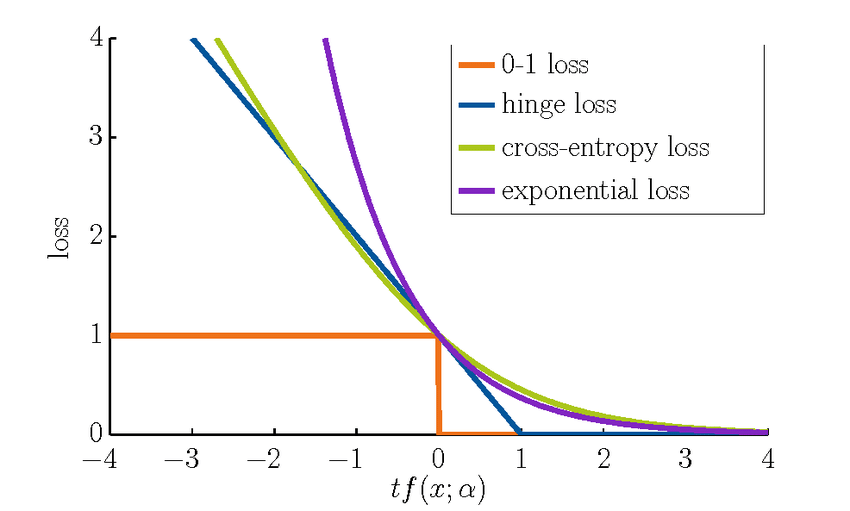

THE HINGE LOSS SUBGRADIENT

Tenemos que
$$ \frac{\partial }{\partial w_i} (1−y(wx+b)) = −yx_i $$
y
$$ \frac{∂ }{\partial w_i} 0 = 0. $$

El primero se satisface para $yn<1$ y el segundo se satisface en otro caso.

In [ ]:
def hinge_loss(y, n):
    return np.maximum(0, 1 - y * n)

In [ ]:
def hinge_subgrad_m(Y, N, X):
    subgrad = []
    for (y,n,x) in zip(Y,N,X):
      if y * n < 1:
          subgrad.append(-y * x)
      else:
          subgrad.append(np.zeros(x.shape))

    return np.mean(subgrad, axis = 0)

In [ ]:
def loss(w, X, y):
    preds = X @ w
    losses = [hinge_loss(y, n) for y, n in zip(y, preds)]
    return np.mean(losses)

In [ ]:
def predictor(w, x):
    return x @ w

def predict(w, X):
    preds = X @ w
    z = (preds > 0).astype(int)
    z[z == 0] = -1
    return z

In [ ]:
def init_w(x):
    return np.random.normal(0, 0.1, x.shape[1])

In [ ]:
w0 = init_w(X_prob)
w0

array([ 0.03787919,  0.08663382,  0.08054904,  0.07166129,  0.00137907,
       -0.1213926 , -0.03569896, -0.07300208, -0.06812904, -0.09638176,
       -0.03557084,  0.03972166,  0.15569457,  0.13177267,  0.01498047,
       -0.01962729, -0.11200823,  0.20436194,  0.13516795, -0.19631586,
       -0.01863424, -0.00394066, -0.07899295,  0.00634552, -0.13760254,
       -0.06980244])

In [ ]:
def subgrad_descent_m(x, y, w, lr=0.1, eps=100):
      for i in range(eps+1):
        idxs = np.arange(y.shape[0])
        np.random.shuffle(idxs)
        y = y[idxs]
        x = x[idxs]

        preds = predict(w, x)
        curr_acc = np.mean(preds == y)

        n = predictor(w, x)
        subgrad = hinge_subgrad_m(y, n, x)
        w = w - lr * subgrad
        obj_val = loss(w, x, y)

        if i % 10 == 0:
          print(f"Current epoch: {i}")
          print(f"Current loss: {obj_val}")
          print(f"Current acc: {curr_acc}\n")
      return w

In [ ]:
w = subgrad_descent_m(X_prob,Y_prob1,w0)

Current epoch: 0
Current loss: 0.5776464960801471
Current acc: 0.7822545569570203

Current epoch: 10
Current loss: 0.3926083080277423
Current acc: 0.8428492349056976

Current epoch: 20
Current loss: 0.3392248756511012
Current acc: 0.8727017516112451

Current epoch: 30
Current loss: 0.30382448450597666
Current acc: 0.894428848206872

Current epoch: 40
Current loss: 0.2801268202871853
Current acc: 0.9052232019295402

Current epoch: 50
Current loss: 0.263674730603537
Current acc: 0.9113320944209402

Current epoch: 60
Current loss: 0.25203318867922186
Current acc: 0.9148313629354315

Current epoch: 70
Current loss: 0.2434329555535628
Current acc: 0.9169665098256297

Current epoch: 80
Current loss: 0.23668818317208073
Current acc: 0.9181527025424064

Current epoch: 90
Current loss: 0.23125240946699016
Current acc: 0.919378435016409

Current epoch: 100
Current loss: 0.22683652233277726
Current acc: 0.9198726819817327



In [ ]:
w

array([-0.54859426, -0.382546  ,  0.16644228,  0.12079734,  0.18437916,
       -0.00179569, -0.03524621,  0.06934694, -0.17228512,  0.0688822 ,
        0.50797389,  0.22284576,  0.14472252,  0.18602952, -0.21350038,
       -0.14552153, -0.1797156 ,  0.2011807 , -0.01237846, -1.25937838,
        0.12574696, -0.03952142, -0.12999194,  0.12895413, -0.06524567,
        0.01020562])

In [ ]:
pred = predict(w,X_prob)
pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_prob1, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [-1, 1])

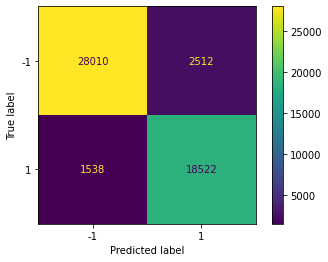

In [ ]:
cm_display.plot()
plt.show()